<a href="https://colab.research.google.com/github/Shooleralbany/-home11-grad-2021-sh236571/blob/main/Rat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%pip install cartopy
%pip install statsmodels
%pip install pyleoclim
%pip install pandas==1.5.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 996.4/996.4 kB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 402.8/402.8 kB 46.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.5/131.5 kB 19.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 885.8/885.8 kB 70.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import pyleoclim as pyleo
import numpy as np

In [4]:
# Access Google Drive locally
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[nan, 59.18, nan, nan, nan, 59.03, nan, nan, nan, 56.07, nan, nan, nan, 57.56, nan, nan, nan, 52.13, nan, nan, nan, 51.51, nan, nan, nan, 51.32, nan, nan, nan, 50.54, nan, nan, nan, 49.9, nan, nan, nan, 49.72, nan, nan, nan, 50.25, nan, nan, nan, 51.38, nan, nan, nan, 51.12, nan, nan, nan, 51.22, nan, nan, nan, 50.34, nan, nan, nan, nan, 48.73, nan, nan, nan, 48.66, nan, nan, nan, 48.65, nan, nan, nan, 50.49, nan, nan, nan, 51.31, nan, nan, nan, 52.26, nan, nan, nan, 53.87, nan, nan, nan, 55.2, nan, nan, nan, 51.39, nan, nan, nan, 51.93, nan, nan, nan, 52.49, nan, nan, nan, 51.96, nan, nan, nan, 54.85, nan, nan, nan, 57.1, nan, nan, nan, 56.9, nan, nan, nan, 57.03, nan, nan, nan, 58.25, nan, nan, nan, 55.28, nan, nan, nan, 50.57, nan, nan, nan, 51.41, nan, nan, nan, 50.85, nan, nan, nan, 49.43, nan, nan, nan, 53.89, nan, nan, nan, 54.61, nan, nan, nan, 53.86, nan, nan, nan, 52.87, nan, nan, nan, 52.91, nan, nan, nan, 55.14, nan, nan, nan, 54.87, nan, nan, nan, 56.43, nan, nan, nan, 56.

IndexError: ignored

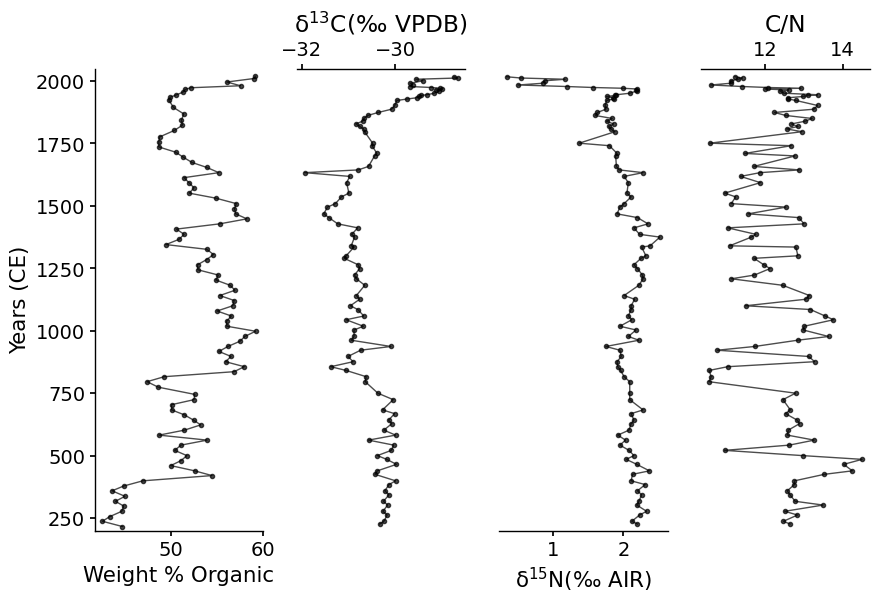

In [5]:
# 1. Reading the data from the TXT file
data_dir = '/content/drive/MyDrive/Time Series'
# Open the dataset assuming it's a CSV file, change to pd.read_table for TSV files
data = pd.read_csv(data_dir+'/Ratdata.txt', sep='\t')
dates = data['CE'].tolist()
values1 = data['Weightorganic'].tolist()
values2 = data['13C'].tolist()
values3 = data['15N'].tolist()
values4 = data['CN'].tolist()
print(values1)


non_nan_data1 = data[['CE','Weightorganic']].dropna()
non_nan_data2 = data[['CE','13C']].dropna()
non_nan_data3 = data[['CE','15N']].dropna()
non_nan_data4 = data[['CE','CN']].dropna()
dates_non_nan1 = non_nan_data1['CE'].tolist()
values_non_nan1 = non_nan_data1['Weightorganic'].tolist()
dates_non_nan2 = non_nan_data2['CE'].tolist()
values_non_nan2 = non_nan_data2['13C'].tolist()
dates_non_nan3 = non_nan_data3['CE'].tolist()
values_non_nan3 = non_nan_data3['15N'].tolist()
dates_non_nan4 = non_nan_data4['CE'].tolist()
values_non_nan4 = non_nan_data4['CN'].tolist()



# 2. Create subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 6))

axes[0].plot(values_non_nan1, dates_non_nan1, label='Weight % Organic', linestyle='-', linewidth=1, alpha=0.7, color='black', marker='o', markersize=3)
axes[1].plot(values_non_nan2, dates_non_nan2, label='δ13C(% VPDB)', linestyle='-', linewidth=1, alpha=0.7, color='black', marker='o',  markersize=3)
axes[2].plot(values_non_nan3, dates_non_nan3, label='δ15N(% AIR)', linestyle='-', linewidth=1, alpha=0.7, color='black', marker='o',  markersize=3)
axes[3].plot(values_non_nan4, dates_non_nan4, label='C/N', linestyle='-', linewidth=1, alpha=0.7, color='black', marker='o',  markersize=3)



# 4. Customizing the subplots
axes[0].set_title('')
axes[0].set_xlabel('Weight % Organic')
axes[0].set_ylabel('Years (CE)')
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(False)

axes[1].set_title('δ$^{13}$C(‰ VPDB)')
axes[1].set_xlabel('')
axes[1].tick_params(axis='x', rotation=0)
axes[1].grid(False)
axes[1].set_yticks([])
axes[1].spines['left'].set_visible(False)
axes[1].spines['bottom'].set_visible(False)
axes[1].spines['top'].set_visible(True)
axes[1].xaxis.tick_top()

axes[2].set_title('')
axes[2].set_xlabel('δ$^{15}$N(‰ AIR)')
axes[2].set_yticks([])
axes[2].spines['left'].set_visible(False)
axes[2].tick_params(axis='x', rotation=0)
axes[2].grid(False)

axes[3].set_title('C/N')
axes[3].set_xlabel('')
axes[3].tick_params(axis='x', rotation=0)
axes[3].grid(False)
axes[3].set_yticks([])
axes[3].spines['left'].set_visible(False)
axes[3].spines['bottom'].set_visible(False)
axes[3].spines['top'].set_visible(True)
axes[3].xaxis.tick_top()


axes[0].set_ylim([200, 2050])
axes[1].set_ylim([200, 2050])
axes[2].set_ylim([200, 2050])
axes[3].set_ylim([200, 2050])
axes[4].set_ylim([200, 2050])

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

[nan, 59.18, nan, nan, nan, 59.03, nan, nan, nan, 56.07, nan, nan, nan, 57.56, nan, nan, nan, 52.13, nan, nan, nan, 51.51, nan, nan, nan, 51.32, nan, nan, nan, 50.54, nan, nan, nan, 49.9, nan, nan, nan, 49.72, nan, nan, nan, 50.25, nan, nan, nan, 51.38, nan, nan, nan, 51.12, nan, nan, nan, 51.22, nan, nan, nan, 50.34, nan, nan, nan, nan, 48.73, nan, nan, nan, 48.66, nan, nan, nan, 48.65, nan, nan, nan, 50.49, nan, nan, nan, 51.31, nan, nan, nan, 52.26, nan, nan, nan, 53.87, nan, nan, nan, 55.2, nan, nan, nan, 51.39, nan, nan, nan, 51.93, nan, nan, nan, 52.49, nan, nan, nan, 51.96, nan, nan, nan, 54.85, nan, nan, nan, 57.1, nan, nan, nan, 56.9, nan, nan, nan, 57.03, nan, nan, nan, 58.25, nan, nan, nan, 55.28, nan, nan, nan, 50.57, nan, nan, nan, 51.41, nan, nan, nan, 50.85, nan, nan, nan, 49.43, nan, nan, nan, 53.89, nan, nan, nan, 54.61, nan, nan, nan, 53.86, nan, nan, nan, 52.87, nan, nan, nan, 52.91, nan, nan, nan, 55.14, nan, nan, nan, 54.87, nan, nan, nan, 56.43, nan, nan, nan, 56.

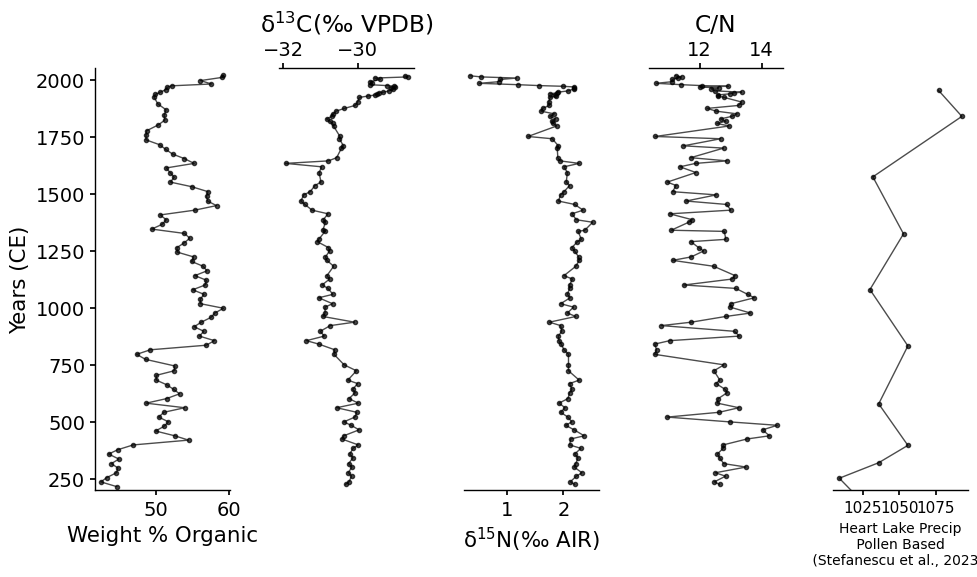

In [6]:
# 1. Reading the data from the TXT file
data_dir = '/content/drive/MyDrive/Time Series'
# Open the dataset assuming it's a CSV file, change to pd.read_table for TSV files
data = pd.read_csv(data_dir+'/Ratdata.txt', sep='\t')
dates = data['CE'].tolist()
values1 = data['Weightorganic'].tolist()
values2 = data['13C'].tolist()
values3 = data['15N'].tolist()
values4 = data['CN'].tolist()
print(values1)

# 1. Reading the data from the first TXT file (Challisdata.txt)
data_dir = '/content/drive/MyDrive/Time Series'
data1 = pd.read_csv(data_dir + '/Longprecip.txt', sep='\t')
dates1 = data1['CE'].tolist()
values5 = data1['Precip'].tolist()

non_nan_data1 = data[['CE','Weightorganic']].dropna()
non_nan_data2 = data[['CE','13C']].dropna()
non_nan_data3 = data[['CE','15N']].dropna()
non_nan_data4 = data[['CE','CN']].dropna()
dates_non_nan1 = non_nan_data1['CE'].tolist()
values_non_nan1 = non_nan_data1['Weightorganic'].tolist()
dates_non_nan2 = non_nan_data2['CE'].tolist()
values_non_nan2 = non_nan_data2['13C'].tolist()
dates_non_nan3 = non_nan_data3['CE'].tolist()
values_non_nan3 = non_nan_data3['15N'].tolist()
dates_non_nan4 = non_nan_data4['CE'].tolist()
values_non_nan4 = non_nan_data4['CN'].tolist()

# 2. Create subplots
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 6))

axes[0].plot(values_non_nan1, dates_non_nan1, label='Weight % Organic', linestyle='-', linewidth=1, alpha=0.7, color='black', marker='o', markersize=3)
axes[1].plot(values_non_nan2, dates_non_nan2, label='δ13C(% VPDB)', linestyle='-', linewidth=1, alpha=0.7, color='black', marker='o',  markersize=3)
axes[2].plot(values_non_nan3, dates_non_nan3, label='δ15N(% AIR)', linestyle='-', linewidth=1, alpha=0.7, color='black', marker='o',  markersize=3)
axes[3].plot(values_non_nan4, dates_non_nan4, label='C/N', linestyle='-', linewidth=1, alpha=0.7, color='black', marker='o',  markersize=3)
axes[4].plot(values5, dates1, label='Heart Precip', linestyle='-', linewidth=1, alpha=0.7, color='black', marker='o',  markersize=3)


# 4. Customizing the subplots
axes[0].set_title('')
axes[0].set_xlabel('Weight % Organic')
axes[0].set_ylabel('Years (CE)')
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(False)

axes[1].set_title('δ$^{13}$C(‰ VPDB)')
axes[1].set_xlabel('')
axes[1].tick_params(axis='x', rotation=0)
axes[1].grid(False)
axes[1].set_yticks([])
axes[1].spines['left'].set_visible(False)
axes[1].spines['bottom'].set_visible(False)
axes[1].spines['top'].set_visible(True)
axes[1].xaxis.tick_top()

axes[2].set_title('')
axes[2].set_xlabel('δ$^{15}$N(‰ AIR)')
axes[2].set_yticks([])
axes[2].spines['left'].set_visible(False)
axes[2].tick_params(axis='x', rotation=0)
axes[2].grid(False)

axes[3].set_title('C/N')
axes[3].set_xlabel('')
axes[3].tick_params(axis='x', rotation=0)
axes[3].grid(False)
axes[3].set_yticks([])
axes[3].spines['left'].set_visible(False)
axes[3].spines['bottom'].set_visible(False)
axes[3].spines['top'].set_visible(True)
axes[3].xaxis.tick_top()

axes[4].set_title('')
axes[4].set_xlabel('Heart Lake Precip\n Pollen Based \n (Stefanescu et al., 2023)  ', fontsize=10)
axes[4].set_yticks([])
axes[4].spines['left'].set_visible(False)
axes[4].tick_params(axis='x', rotation=0)
axes[4].grid(False)
axes[4].tick_params(axis='both', labelsize=11)

axes[0].set_ylim([200, 2050])
axes[1].set_ylim([200, 2050])
axes[2].set_ylim([200, 2050])
axes[3].set_ylim([200, 2050])
axes[4].set_ylim([200, 2050])

# Adjust layout and show the plots
plt.tight_layout()
plt.show()